# **Titanic Data Science Solutions**

# Table of content

[0.Disclaimer](#0)

[I. Define the problem](#I)
* [1. Problem description](#I1)
* [2. Methodology](#I2)
* [3. Tools importing](#I3)

[II. Gather the data](#II)

[III. Perform Exploratory Analysis and visualize the data](#III)
* [1. Descriptive analysis of the data](#III1)
* [2. Pivot analysis](#III2)
* [3. Analyze by visualizing data](#III3)
* [4. Analysis Summary](#III4)
    
[IV. Wrangle, cleanse and Prepare Data for Consumption](#IV)
* [0. The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#IV0)
* [1. Dropping features](#IV1)
* [2. Sex: converting feature to numerical values](#IV2)
* [3. Embarked: completing and converting to numerical values](#IV3)
* [4. Age: completing feature with its mean value](#IV4)
* [5. Fare: completing feature with its mean value](#IV5)
* [6. Name: extracting information from this feature, and converting it to numerical values](#IV6)
* [7. Ticket: extracting information from this feature, and converting it to numerical values](#IV7)
* [8. Cabin: extracting information from this feature, and converting it to numerical values](#IV8)
* [9. SibSp Parch: combining features](#IV9)

[V. Model data](#V)
* [1. Creating and normalizing matrices for our model](#V1)
* [2. Modeling](#V2)
* [3. Evaluate Model Performance](#V3)
* [4. Tune Model with Feature Selection](#V4)

[VI. Optimize and Strategize](#VI)

[VII. Model Submission](#VII)


 ## **<div id="0">0. Disclaimer</div>**

This project is my first Data Science Project. I'm seeing it as a sandbox, and as a way to go indepth through the whole data science process. I am getting help from the ressources below :
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/zlatankr/titanic-random-forest-82-78

**Edit**: This kernel is a work in progress. Feel free to contribute or ask questions in the comment section, I will be happy to answer. :-)

## **<div id="I">I. Define the problem</div>**

### **<div id="I1">1. Problem description</div>**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Here, we are trying to to complete the analysis of what sorts of people were likely to survive. In particular, we are going to apply the tools of machine learning to predict which passengers survived the tragedy.

This is a classification problem.

### **<div id="I2">2. Methodology</div>**

The methodology involved in this machine learning problem go through multiple stages :

* **1. Define the Problem**: If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.
* **2. Gather the Data**: John Naisbitt wrote in his 1984 (yes, 1984) book Megatrends, we are “drowning in data, yet staving for knowledge." So, chances are, the dataset(s) already exist somewhere, in some format. It may be external or internal, structured or unstructured, static or streamed, objective or subjective, etc. As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."
* **3. Prepare Data for Consumption**: This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.
* **4. Perform Exploratory Analysis**: Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.
* **5. Model Data**: Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.
* **6. Validate and Implement Data Model**: After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our model overfit, generalize, or underfit our dataset.
* **7. Optimize and Strategize**: This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.

### **<div id="I3">3. Tools importing</div>**

Here we are importing every useful tool needed during our research process.

In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# File handling
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'gender_submission.csv']


## **<div id="II">II. Gather the data</div>**

We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
training_df = pd.read_csv("../input/train.csv")
testing_df = pd.read_csv("../input/test.csv")
combine = [training_df, testing_df]

## **<div id="III">III. Perform Exploratory Analysis and visualize the data</div>**

### **<div id="III1">1. Descriptive analysis of the data</div>**

Here we want to answer the following questions :
* Which features are categorical?
* Which features are numerical?
* Which features are mixed data types?
* Which features may contain errors or typos?
* Which features contain blank, null or empty values?
* What are the data types for various features?

We can first display the first rows of the training dataset, in order to have an overview of the parameters :

In [3]:
# preview the data
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Then we can display the data type of each feature :
* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).

In [4]:
training_df.info()
print('_'*40)
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

Then, we can display a quick descriptive representation of the dataset :
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers within age range 65-80.

In [5]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [6]:
training_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wick, Miss. Mary Natalie",male,1601,B96 B98,S
freq,1,577,7,4,644


### **First assumptions**

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating**
* We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**
* We may want to complete Age feature as it is definitely correlated to survival.
* We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**
* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.

**Classifying**
* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.


### **<div id="III2">2. Pivot analysis</div>**

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.
* **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.
* **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.


In [7]:
training_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
training_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
training_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
training_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### **<div id="III3">3. Analyze by visualizing data</div>**

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Observations**
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

**Decisions**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

* We should consider Age in our model training.
* Complete the Age feature for null values.
* We should band age groups.


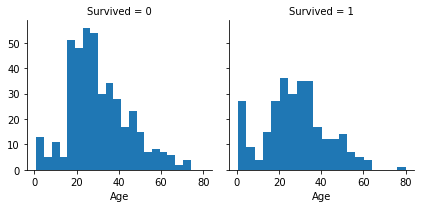

In [11]:
g = sns.FacetGrid(training_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations**
* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

**Decisions**
* Consider Pclass for model training.


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


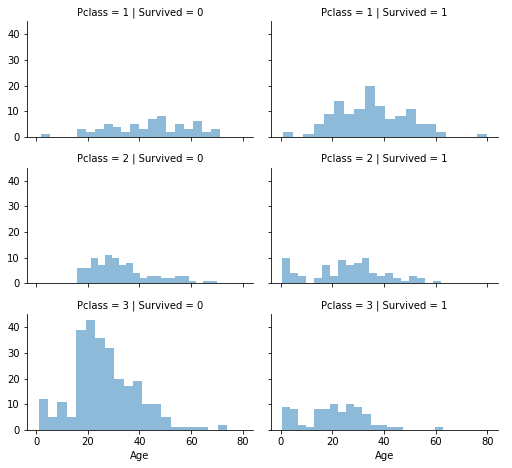

In [12]:
grid = sns.FacetGrid(training_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Now we can correlate categorical features with our solution goal.

**Observations**
* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

**Decisions**
* Add Sex feature to model training.
* Complete and add Embarked feature to model training.


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


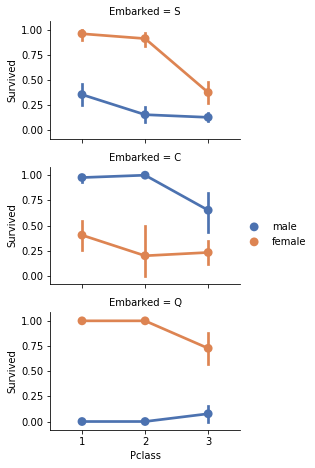

In [13]:
grid = sns.FacetGrid(training_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations**
* Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.
* Port of embarkation correlates with survival rates.

**Decisions**
* Consider banding Fare feature.


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


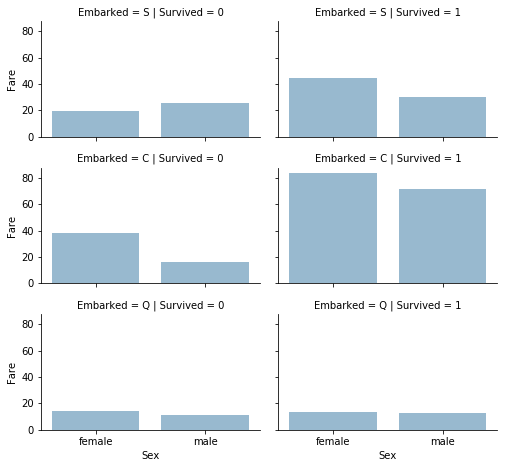

In [14]:
grid = sns.FacetGrid(training_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### **<div id="III4">4. Analysis Summary</div>**

After this first analysis work, we can summarize the first decisions we took:
* In our model training, we should consider:
  * Pclass
  * Sex
  * Age
  * SibSp
  * Parch
  * Fare
  * Embarked
  * Name
* In our model training, we shall not consider:
    * PassengerId
    * Ticket
    * Cabin
* In our model training, we may:
    * Complete the Age feature for null values.
    * Complete Embarked feature to model training.
    * Band age groups. 
    * Band Fare feature.
    * Create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    * Engineer the Name feature to extract Title as a new feature.
* Edit : For my second iteration, I'm trying to get additional information from columns like "Cabin" and "Ticket, and to perform more feature engineering on the other columns, for example getting the length of "Names".

## **<div id="IV">IV. Wrangle, cleanse and Prepare Data for Consumption</div>**

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### **<div id="IV0">0. The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting</div>**

In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

* **Correcting**: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
* **Completing**: There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
* **Creating**: Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
* **Converting**: Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

### **<div id="IV1">1. Dropping features</div>**

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin, PassengerId and Ticket features.

**Edit**: We are not dropping *Cabin* and *Ticket* anymore, since we want ot get information about these features.

In [15]:
column_choice_training = training_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name','Survived']]
column_choice_test = testing_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name']]
column_choice_training.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1
3,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0


### **<div id="IV2">2. Sex: converting feature to numerical values</div>**

Now let's convert the sex feature, which contain strings, to numerical values.

In [16]:
column_choice_training.Sex[column_choice_training.Sex == 'female'] = 0
column_choice_training.Sex[column_choice_training.Sex == 'male'] = 1
column_choice_test.Sex[column_choice_test.Sex == 'female'] = 0
column_choice_test.Sex[column_choice_test.Sex == 'male'] = 1
column_choice_training.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, 

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1
3,1,0,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,1,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0


### **<div id="IV3">3. Embarked: completing and converting to numerical values</div>**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.
Then we convert the feature, which contain strings, to numerical values.

In [17]:
#Transformations of test set data must always be fit using training data
freq_port = column_choice_training.Embarked.dropna().mode()[0]
column_choice_training.Embarked = column_choice_training.Embarked.fillna(freq_port)
column_choice_test.Embarked = column_choice_test.Embarked.fillna(freq_port)
column_choice_training.Embarked[column_choice_training.Embarked == 'S'] = 0
column_choice_training.Embarked[column_choice_training.Embarked == 'C'] = 1
column_choice_training.Embarked[column_choice_training.Embarked == 'Q'] = 2
column_choice_test.Embarked[column_choice_test.Embarked == 'S'] = 0
column_choice_test.Embarked[column_choice_test.Embarked == 'C'] = 1
column_choice_test.Embarked[column_choice_test.Embarked == 'Q'] = 2
column_choice_training.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/si

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1
3,1,0,35.0,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,1,35.0,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0


### **<div id="IV4">4. Age: completing feature with its mean value</div>**

A lot of things come into mind for the Age feature:
* This feature has a lot of missing values. We can first fill these missing values with the mean of the feature, but we can also try to find out a clever way,
* We can store the fact that some Age values are missing, in a new column,
* We can see what happened to babies and old people.

First, let's bin the feature to see what happened to young and old people. We can observe that babies (age < 6) had a higher survival rate, and that older people (age > 60) had a lower survival rate.

In [18]:
bins = [0, 6, 60, 80]
column_choice_training['Age_cut'] = pd.cut(column_choice_training['Age'], bins)
column_choice_test['Age_cut'] = pd.cut(column_choice_test['Age'], bins)

print(column_choice_training['Age_cut'].value_counts())
column_choice_training[['Age_cut', 'Survived']].groupby(['Age_cut'], as_index=False).mean().sort_values(by='Survived', ascending=False)

(6, 60]     645
(0, 6]       47
(60, 80]     22
Name: Age_cut, dtype: int64


,Age_cut,Survived
0,"(0, 6]",0.702128
1,"(6, 60]",0.390698
2,"(60, 80]",0.227273


Next, let's store in a new binary column the rows where the Age value is missing. 

In [19]:
column_choice_training['Age_is_Null'] = column_choice_training['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
column_choice_test['Age_is_Null'] = column_choice_test['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [20]:
column_choice_training[['Age', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,Age
0,1,0,34.611765
1,1,1,41.281386
2,2,0,28.722973
3,2,1,30.740707
4,3,0,21.750000
5,3,1,26.507589


We can observe that the age mean differs a lot according to the sex and the Pclass. A clever way of filling the missing values is by taking the mean age, according to the sex and the Pclass.

In [21]:
age_means = column_choice_training.groupby(['Sex', 'Pclass'])['Age']
column_choice_training.Age = age_means.transform(lambda x: x.fillna(x.mean()))
#Transformations of test set data must always be fit using training data
column_choice_test.Age = age_means.transform(lambda x: x.fillna(x.mean()))
column_choice_training.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_cut,Age_is_Null
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,"(6.0, 60.0]",0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"(6.0, 60.0]",0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,"(6.0, 60.0]",0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,"(6.0, 60.0]",0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,"(6.0, 60.0]",0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,NaN,1


Finally, let's store in 2 new columns the information about babies (age < 6) and older people (age > 60);

In [22]:
bins = [0, 6, 60, 80]
column_choice_training['Age_cut'] = pd.cut(column_choice_training['Age'], bins)
column_choice_test['Age_cut'] = pd.cut(column_choice_test['Age'], bins)

column_choice_training = pd.concat([column_choice_training.drop(['Age_cut'], axis=1),
                                    pd.get_dummies(column_choice_training['Age_cut'], prefix = 'Age_cut')], axis=1)
column_choice_training = column_choice_training.drop(['Age_cut_(6, 60]'], axis=1)
column_choice_test = pd.concat([column_choice_test.drop(['Age_cut'], axis=1), 
                                pd.get_dummies(column_choice_test['Age_cut'], prefix = 'Age_cut')], axis=1)
column_choice_test = column_choice_test.drop(['Age_cut_(6, 60]'], axis=1)
column_choice_training.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]"
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,0,0,0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,0,0,0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,0,0,0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,1,0,0


### **<div id="IV5">5. Fare: completing feature with its mean value</div>**

The Fare feature has one missing value .Here, we choose to fill this missing values with the mean of the feature.
We can later try finding a better way to fill these missing values, but for now, we can use this method, which gives usually good results.

In [23]:
column_choice_training.Fare = column_choice_training.Fare.fillna(column_choice_training.Fare.mean())
#Transformations of test set data must always be fit using training data
column_choice_test.Fare = column_choice_test.Fare.fillna(column_choice_training.Fare.mean())
column_choice_training.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]"
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,0,0,0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,0,0,0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,0,0,0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,1,0,0


### **<div id="IV6">6. Name: extracting information from this feature, and converting it to numerical values</div>**

We want to analyze if the Name feature can be engineered to extract titles (Mr, Mrs, Miss...). Then we want to extract this information into a new column called "Title", and convert each Title to a numerical value.

First of all, let's split the "Name" feature in order to extract the Titles, and create a new column "Title", filled with them.

In [24]:
column_choice_training['Name_Length'] = column_choice_training['Name'].apply(len)
column_choice_test['Name_Length'] = column_choice_test['Name'].apply(len)
column_choice_training.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,0,0,0,23
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,0,51
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,0,0,0,22
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,0,44
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,0,0,0,24
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,1,0,0,16


Then, let's split the "Name" feature in order to extract the Titles, and create a new column "Title", filled with them.

In [25]:
column_choice_training['Title'] = column_choice_training['Name'].str.split(', ').str[1]
column_choice_training['Title'] = column_choice_training['Title'].str.split('.').str[0]
column_choice_training = column_choice_training.drop(['Name'], axis=1)
column_choice_test['Title'] = column_choice_test['Name'].str.split(', ').str[1]
column_choice_test['Title'] = column_choice_test['Title'].str.split('.').str[0]
column_choice_test = column_choice_test.drop(['Name'], axis=1)

In [26]:
column_choice_training.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,23,Mr
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,1,0,0,0,51,Mrs
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,22,Miss
3,1,0,35.000000,1,0,113803,53.1000,C123,0,1,0,0,0,44,Mrs
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,0,0,0,0,24,Mr
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,0,1,0,0,16,Mr


Then, we want to visualize every possible "Title" value, and correlate them with the Sex column. 

In [27]:
pd.crosstab(column_choice_training['Title'], column_choice_training['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [28]:
pd.crosstab(column_choice_test['Title'], column_choice_test['Sex'])

Sex,0,1
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


Here, we can see that some titles are very rare, and some of them are very common. Besides, sometimes many titles means the same thing (for example, Mrs = Ms = Mlle = Lady).
We choose to regroup each rare title into one unique category, and to normalize titles.

In [29]:
column_choice_training['Title'] = column_choice_training['Title'].replace(['the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare')
column_choice_training['Title'] = column_choice_training['Title'].replace(['Lady','Mlle', 'Ms'], 'Mrs')
column_choice_training['Title'] = column_choice_training['Title'].replace(['Mme'], 'Miss')
column_choice_test['Title'] = column_choice_test['Title'].replace(['Col', 'Dona', 'Dr', 'Rev'], 'Rare')
column_choice_test['Title'] = column_choice_test['Title'].replace(['Ms'], 'Mrs')
pd.crosstab(column_choice_training['Title'], column_choice_training['Sex'])

Sex,0,1
Title,,
Master,0,40
Miss,183,0
Mr,0,517
Mrs,129,0
Rare,2,20


In [30]:
pd.crosstab(column_choice_test['Title'], column_choice_test['Sex'])

Sex,0,1
Title,,
Master,0,21
Miss,78,0
Mr,0,240
Mrs,73,0
Rare,1,5


Finally, let's convert the title feature, which contain strings, to numerical values.

In [31]:
column_choice_training.Title[column_choice_training.Title == 'Master'] = 0
column_choice_training.Title[column_choice_training.Title == 'Miss'] = 1
column_choice_training.Title[column_choice_training.Title == 'Mr'] = 2
column_choice_training.Title[column_choice_training.Title == 'Mrs'] = 3
column_choice_training.Title[column_choice_training.Title == 'Rare'] = 4
column_choice_test.Title[column_choice_test.Title == 'Master'] = 0
column_choice_test.Title[column_choice_test.Title == 'Miss'] = 1
column_choice_test.Title[column_choice_test.Title == 'Mr'] = 2
column_choice_test.Title[column_choice_test.Title == 'Mrs'] = 3
column_choice_test.Title[column_choice_test.Title == 'Rare'] = 4
column_choice_training.head(6)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,23,2
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,1,0,0,0,51,3
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,22,1
3,1,0,35.000000,1,0,113803,53.1000,C123,0,1,0,0,0,44,3
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,0,0,0,0,24,2
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,0,1,0,0,16,2


### **<div id="IV7">7. Ticket: extracting information from this feature, and converting it to numerical values</div>**

One piece of potentially useful informatin is the number of characters in the Ticket column. This could be a reflection of the 'type' of ticket a given passenger had, which could somehow indicate their chances of survival. One theory is that some characteristic of the ticket could indicate the location of the passenger's room, which might be a crucial factor in their escape route, and consequently their survival.

In [32]:
column_choice_training['Ticket_Len'] = column_choice_training['Ticket'].apply(len)
column_choice_test['Ticket_Len'] = column_choice_test['Ticket'].apply(len)
print(column_choice_test['Ticket_Len'].value_counts())
column_choice_training[['Ticket_Len', 'Survived']].groupby(['Ticket_Len'], as_index=False).mean().sort_values(by='Survived', ascending=False)

6     183
5      62
4      47
8      42
10     22
9      11
11     10
13      9
7       9
18      8
12      6
15      3
17      2
16      2
3       2
Name: Ticket_Len, dtype: int64


,Ticket_Len,Survived
2,5,0.618321
5,8,0.539474
13,17,0.428571
9,12,0.400000
10,13,0.400000
1,4,0.366337
7,10,0.341463
11,15,0.333333
3,6,0.319809
4,7,0.296296


Another piece of information is the first letter of each ticket, which, again, might be indicative of a certain attribute of the ticketholders or their rooms.

In [33]:
#Getting the first letter of the column
column_choice_training['Ticket_Letter'] = column_choice_training['Ticket'].str[0]
column_choice_test['Ticket_Letter'] = column_choice_test['Ticket'].str[0]
#Displaying values counts and survival rates
print(column_choice_training['Ticket_Letter'].value_counts())
print(column_choice_test['Ticket_Letter'].value_counts())
column_choice_training[['Ticket_Letter', 'Survived']].groupby(['Ticket_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Letter, dtype: int64
3    128
2     95
1     64
P     33
S     33
C     30
A     13
F      6
W      6
7      4
6      3
9      1
4      1
L      1
Name: Ticket_Letter, dtype: int64


,Ticket_Letter,Survived
8,9,1.000000
13,P,0.646154
0,1,0.630137
11,F,0.571429
1,2,0.464481
10,C,0.340426
14,S,0.323077
12,L,0.250000
2,3,0.239203
3,4,0.200000


Then we can group the letters with small value counts, based on their survival rate

In [34]:
column_choice_training['Ticket_Letter'] = column_choice_training['Ticket_Letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Surv')
column_choice_training['Ticket_Letter'] = column_choice_training['Ticket_Letter'].replace(['F', '9'], 'Rare_High_Surv')
column_choice_test['Ticket_Letter'] = column_choice_test['Ticket_Letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Surv')
column_choice_test['Ticket_Letter'] = column_choice_test['Ticket_Letter'].replace(['F', '9'], 'Rare_High_Surv')
column_choice_training.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title,Ticket_Len,Ticket_Letter
886,2,1,27.00,0,0,211536,13.00,NaN,0,0,0,0,0,21,4,6,2
887,1,0,19.00,0,0,112053,30.00,B42,0,1,0,0,0,28,1,6,1
888,3,0,21.75,1,2,W./C. 6607,23.45,NaN,0,0,1,0,0,40,1,10,Rare_Low_Surv
889,1,1,26.00,0,0,111369,30.00,C148,1,1,0,0,0,21,2,6,1
890,3,1,32.00,0,0,370376,7.75,NaN,2,0,0,0,0,19,2,6,3


Finally, we are using the "get_dummies" function to convert the *Ticket_Letter* column into dummy columns that can be used by our future models.

We do not longer need the Ticket and Ticket_Letter columns, we can drop them.

In [35]:
column_choice_training = pd.concat([column_choice_training.drop(['Ticket', 'Ticket_Letter'], axis=1), 
                                    pd.get_dummies(column_choice_training['Ticket_Letter'], prefix = 'Ticket_Letter')], axis=1)
column_choice_test = pd.concat([column_choice_test.drop(['Ticket', 'Ticket_Letter'], axis=1), 
                                    pd.get_dummies(column_choice_test['Ticket_Letter'], prefix = 'Ticket_Letter')], axis=1)
column_choice_training.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Age_is_Null,...,Ticket_Len,Ticket_Letter_1,Ticket_Letter_2,Ticket_Letter_3,Ticket_Letter_A,Ticket_Letter_C,Ticket_Letter_P,Ticket_Letter_Rare_High_Surv,Ticket_Letter_Rare_Low_Surv,Ticket_Letter_S
0,3,1,22.0,1,0,7.2500,NaN,0,0,0,...,9,0,0,0,1,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,C85,1,1,0,...,8,0,0,0,0,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,NaN,0,1,0,...,16,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,C123,0,1,0,...,6,1,0,0,0,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,NaN,0,0,0,...,6,0,0,1,0,0,0,0,0,0


### **<div id="IV8">8. Cabin: extracting information from this feature, and converting it to numerical values</div>**

One piece of potentially useful informatin is the first letter of each ticket, which, again, might be indicative of a certain attribute of the ticketholders or their rooms. We need to : 
* Fill in missing values
* Display values counts and survival rates according to the first letter of the cabin
* Use the "get_dummies" function to convert the *Cabin_Letter* column into dummy columns that can be used by our future models.

In [36]:
#Filling missing values
column_choice_training.Cabin = column_choice_training.Cabin.fillna('N0')
column_choice_test.Cabin = column_choice_test.Cabin.fillna('N0')
#Getting the first letter of the column
column_choice_training['Cabin_Letter'] = column_choice_training['Cabin'].str[0]
column_choice_test['Cabin_Letter'] = column_choice_test['Cabin'].str[0]
#Displaying values counts and survival rates
print(column_choice_training['Cabin_Letter'].value_counts())
print(column_choice_test['Cabin_Letter'].value_counts())
column_choice_training[['Cabin_Letter', 'Survived']].groupby(['Cabin_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Letter, dtype: int64


,Cabin_Letter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,N,0.299854
8,T,0.000000


Another piece of information is the ticket number. We can band them and use the "get_dummies" function to convert the *Cabin_Number* column into dummy columns

In [37]:
#Getting cabin number
column_choice_training['Cabin_Number'] = column_choice_training['Cabin'].str.split(' ').str[-1].str[1:]
column_choice_test['Cabin_Number'] = column_choice_test['Cabin'].str.split(' ').str[-1].str[1:]

#Replacing 0 values by NaN
column_choice_training['Cabin_Number'] = column_choice_training['Cabin_Number'].replace(['0'], np.NaN)
column_choice_test['Cabin_Number'] = column_choice_test['Cabin_Number'].replace(['0'], np.NaN)

#Converting numbers to int values
column_choice_training['Cabin_Number'] = column_choice_training['Cabin_Number'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
column_choice_test['Cabin_Number'] = column_choice_test['Cabin_Number'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

#Banding the feature
column_choice_training['Cabin_Number_cut'] = pd.qcut(column_choice_training['Cabin_Number'],4)
column_choice_test['Cabin_Number_cut'] = pd.qcut(column_choice_test['Cabin_Number'],4)

#Getting dummies
column_choice_training = pd.concat([column_choice_training.drop(['Cabin_Number', 'Cabin_Number_cut'], axis=1), 
                                    pd.get_dummies(column_choice_training['Cabin_Number_cut'], prefix = 'Cabin_num')], axis=1)
column_choice_test = pd.concat([column_choice_test.drop(['Cabin_Number', 'Cabin_Number_cut'], axis=1), 
                                    pd.get_dummies(column_choice_test['Cabin_Number_cut'], prefix = 'Cabin_num')], axis=1)
column_choice_training.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Age_is_Null,...,Ticket_Letter_C,Ticket_Letter_P,Ticket_Letter_Rare_High_Surv,Ticket_Letter_Rare_Low_Surv,Ticket_Letter_S,Cabin_Letter,"Cabin_num_(1.999, 24.0]","Cabin_num_(24.0, 43.0]","Cabin_num_(43.0, 77.25]","Cabin_num_(77.25, 148.0]"
0,3,1,22.0,1,0,7.2500,N0,0,0,0,...,0,0,0,0,0,N,0,0,0,0
1,1,0,38.0,1,0,71.2833,C85,1,1,0,...,0,1,0,0,0,C,0,0,0,1
2,3,0,26.0,0,0,7.9250,N0,0,1,0,...,0,0,0,0,1,N,0,0,0,0
3,1,0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,0,C,0,0,0,1
4,3,1,35.0,0,0,8.0500,N0,0,0,0,...,0,0,0,0,0,N,0,0,0,0


In [38]:
#There is no "T" in the test set. We replace its value to a "N", since the guy has not survived and the survival rate is low for people without cabin information
column_choice_training['Cabin_Letter'] = column_choice_training['Cabin_Letter'].replace(['T'], 'N')

column_choice_training = pd.concat([column_choice_training.drop(['Cabin', 'Cabin_Letter'], axis=1), 
                                    pd.get_dummies(column_choice_training['Cabin_Letter'], prefix = 'Cabin_Letter')], axis=1)
column_choice_test = pd.concat([column_choice_test.drop(['Cabin', 'Cabin_Letter'], axis=1), 
                                    pd.get_dummies(column_choice_test['Cabin_Letter'], prefix = 'Cabin_Letter')], axis=1)
column_choice_training.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]",...,"Cabin_num_(43.0, 77.25]","Cabin_num_(77.25, 148.0]",Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_N
0,3,1,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### **<div id="IV9">9. SibSp Parch: combining features</div>**


When we have two seemingly weak predictors, one thing we can do is combine them to get a stronger predictor. In the case of SibSp and Parch, we can combine the two variables to get a 'family size' metric, which might prove to be a better predictor than the two original variables.


In [39]:
#Creating the Family column
column_choice_training['Family'] = column_choice_training['SibSp'] + column_choice_training['Parch']
column_choice_test['Family'] = column_choice_test['SibSp'] + column_choice_test['Parch']

column_choice_training['Family'] = column_choice_training['Family'].replace([0], 'Alone')
column_choice_training['Family'] = column_choice_training['Family'].replace([1, 2, 3], 'Little_Family')
column_choice_training['Family'] = column_choice_training['Family'].replace([4, 5, 6, 7, 10], 'Big_Family')
column_choice_test['Family'] = column_choice_test['Family'].replace([0], 'Alone')
column_choice_test['Family'] = column_choice_test['Family'].replace([1, 2, 3], 'Little_Family')
column_choice_test['Family'] = column_choice_test['Family'].replace([4, 5, 6, 7, 10], 'Big_Family')

print(column_choice_training['Family'].value_counts())
print(column_choice_test['Family'].value_counts())
column_choice_training[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

column_choice_training = pd.concat([column_choice_training.drop(['SibSp', 'Parch', 'Family'], axis=1), 
                                    pd.get_dummies(column_choice_training['Family'], prefix = 'Family')], axis=1)
column_choice_test = pd.concat([column_choice_test.drop(['SibSp', 'Parch', 'Family'], axis=1), 
                                    pd.get_dummies(column_choice_test['Family'], prefix = 'Family')], axis=1)

Alone            537
Little_Family    292
Big_Family        62
Name: Family, dtype: int64
Alone            253
Little_Family    145
Big_Family        20
Name: Family, dtype: int64


In [40]:
column_choice_training.head(6)

,Pclass,Sex,Age,Fare,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,...,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_N,Family_Alone,Family_Big_Family,Family_Little_Family
0,3,1,22.000000,7.2500,0,0,0,0,0,23,...,0,0,0,0,0,0,1,0,0,1
1,1,0,38.000000,71.2833,1,1,0,0,0,51,...,0,1,0,0,0,0,0,0,0,1
2,3,0,26.000000,7.9250,0,1,0,0,0,22,...,0,0,0,0,0,0,1,1,0,0
3,1,0,35.000000,53.1000,0,1,0,0,0,44,...,0,1,0,0,0,0,0,0,0,1
4,3,1,35.000000,8.0500,0,0,0,0,0,24,...,0,0,0,0,0,0,1,1,0,0
5,3,1,26.507589,8.4583,2,0,1,0,0,16,...,0,0,0,0,0,0,1,1,0,0


## **<div id="V">V. Model data</div>**

Now that we have acquired, analyzed and prepared the data, we are ready to train a model and predict the required solution. 
There are many predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Here we are performing supervised learning, and our problem is a classification and regression problem. With these two criteria, we can narrow down our choice of models to a few. These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

### **<div id="V1">1. Creating and normalizing matrices for our model</div>**

First, we need to prepare and normalize our train and test matrices, which we are then going to use for our models.

**Normalizing the data** has two purposes : 
* Making training less sensitive to the scale of features. If we don't normalize the data when we face features with different scales (for example, age and house price), our ML algorithms might take too much care to features with large scales.
* Accelerating optimization. Most machine learning optimizations are solved using gradient descent, or a variant thereof. And the speed of convergence depends on the scaling of features. Normalization makes the problem better conditioned, improving the convergence rate of gradient descent.

In [41]:
X_train = np.asarray(column_choice_training.drop(['Survived'], axis=1))
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[ 0.82737724,  0.73769513, -0.55136635, -0.50244517, -0.56883712,
        -0.49789473, -0.23598136, -0.15911146, -0.42745127,  0.12845875,
         0.81967201, -0.44268855, -0.50840395, -0.7142615 ,  5.45198477,
        -0.23598136, -0.28052182, -0.09518415, -0.23598136, -0.28052182,
        -0.24895491, -0.23861999, -0.24382992, -0.24382992, -0.13085598,
        -0.23598136, -0.26629582, -0.19611614, -0.19300938, -0.12168146,
        -0.06715343,  0.54319254, -1.2316449 , -0.2734756 ,  1.4322604 ],
       [-1.56610693, -1.35557354,  0.65402951,  0.78684529,  1.00518113,
        -0.49789473, -0.23598136, -0.15911146,  2.59096206,  1.40020036,
         0.455237  , -0.44268855, -0.50840395, -0.7142615 , -0.18341944,
        -0.23598136,  3.56478503, -0.09518415, -0.23598136, -0.28052182,
        -0.24895491, -0.23861999, -0.24382992,  4.10121933, -0.13085598,
        -0.23598136,  3.75522235, -0.19611614, -0.19300938, -0.12168146,
        -0.06715343, -1.84096783, -1.2316449 , -0.

In [42]:
X_test = np.asarray(column_choice_test)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.87348191,  0.75592895, -0.49733565, -0.49825799,  2.24316522,
        -0.50895594, -0.25221664, -0.14834045, -1.15301894,  0.10697963,
        -0.31070953, -0.4251952 , -0.54232614,  1.50519932, -0.17916128,
        -0.278064  , -0.29277002, -0.13050529, -0.19292704, -0.29277002,
        -0.24130447, -0.23570226, -0.24680702, -0.22416792, -0.13050529,
        -0.21213203, -0.30229756, -0.17916128, -0.14834045, -0.13968606,
        -0.04897021,  0.52752958,  0.80757285, -0.22416792, -0.72879046],
       [ 0.87348191, -1.32287566,  0.7396596 , -0.51312516, -0.6778412 ,
        -0.50895594, -0.25221664, -0.14834045,  0.45352078,  1.38462203,
        -0.31070953, -0.4251952 , -0.54232614,  1.50519932, -0.17916128,
        -0.278064  , -0.29277002, -0.13050529, -0.19292704, -0.29277002,
        -0.24130447, -0.23570226, -0.24680702, -0.22416792, -0.13050529,
        -0.21213203, -0.30229756, -0.17916128, -0.14834045, -0.13968606,
        -0.04897021,  0.52752958, -1.23827837, -0.

In [43]:
y_train = np.asarray(column_choice_training['Survived'])
y_train[0:5]

array([0, 1, 1, 1, 0])

In [44]:
print ('Train set:', X_train.shape,y_train.shape)
print ('Test set:', X_test.shape)

Train set: (891, 35) (891,)
Test set: (418, 35)


### **<div id="V2">2. Modeling</div>**

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

#### **a. Cross validation**

For a prediction problem, a model is generally provided with a data set of known data, called the training data set, and a set of unknown data against which the model is tested, known as the test data set. The target is to have a data set for testing the model in the training phase and then provide insight on how the specific model adapts to an independent data set. A round of cross-validation comprises the partitioning of data into complementary subsets, then performing analysis on one subset. After this, the analysis is validated on other subsets (testing sets). To reduce variability, many rounds of cross-validation are performed using many different partitions and then an average of the results are taken. **Cross-validation is a powerful technique in the estimation of model performance technique.**

Here, we are using the ShuffleSplit function from Scikit Learn. ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set. The test_size and train_size parameters control how large the test and training test set should be for each iteration. Since you are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration.  

The main difference between ShuffleSplit and K-Fold is that In KFold, during each round you will use one fold as the test set and all the remaining folds as your training set. However, in ShuffleSplit, during each round n you should only use the training and test set from iteration n. **As your data set grows, cross validation time increases, making shufflesplits a more attractive alternate**. If you can train your algorithm, with a certain percentage of your data as opposed to using all k-1 folds, ShuffleSplit is an attractive option.

In [45]:
models = [
    LogisticRegression(solver='liblinear'), 
    RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 1)
    ]

model_results = pd.DataFrame(data = {'test_score_mean': [], 'fit_time_mean': []})

# Spliting the model
cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
# Performing shufflesplit cross validation, with the whole training set (the cross_validate function coupled with ShuffleSplit take care of spliting the training set) 
for model in models:
    cross_validation_results = model_selection.cross_validate(model, X_train, y_train, cv= cross_validation_split, return_train_score=True)
    # Checking the mean of test scores for each iteration of the validation
    model_results = model_results.append({'test_score_mean' : cross_validation_results['test_score'].mean(), 
                                      'fit_time_mean' : cross_validation_results['fit_time'].mean()}, ignore_index=True) 
 
model_results

,test_score_mean,fit_time_mean
0,0.820896,0.008144
1,0.833955,0.164294


#### **b. Tune Model with Hyper-Parameters**

In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training.

Different model training algorithms require different hyperparameters, some simple algorithms (such as ordinary least squares regression) require none. Given these hyperparameters, the training algorithm learns the parameters from the data. Model hyperparameters are set manually and are used in processes to help estimate model parameters.
**Tuning an hyperparameter means trying to get the closest possible to its best value, in order to maximize the accuracy of the model** (for larger dataset, time computing may also be taken into account for parameter tuning).

First, we are using **RandomizedSearchCV**. We need to create a parameter grid to sample from during fitting. On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2x6x6x8x8 = 4608 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [46]:
RFC = RandomForestClassifier(oob_score = True, random_state = 1)
param_grid = {'min_samples_leaf' : [1, 2, 4, 6, 8, 10], 
              'min_samples_split' : [2, 4, 6, 8, 10, 12, 14, 16], 
              'n_estimators': [200, 500, 800, 1100]}
#'criterion' : ["gini", "entropy"],
#'max_depth': [10, 20, 30, 40, 50, None],

#RS = RandomizedSearchCV(estimator = RFC, 
                        param_distributions = param_grid, 
                        n_iter = 100, 
                        cv = cross_validation_split, verbose = 2, random_state = 0, n_jobs = -1)

#RS = RS.fit(X_train, y_train)

print(RS.best_score_)
print(RS.best_params_)

IndentationError: unexpected indent (<ipython-input-46-13f2701e47e7>, line 9)

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with **GridSearchCV**, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [47]:
param_grid = { 'criterion' : ['gini', 'entropy'],
              #'max_depth': [45, 50, None],
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [3, 4, 5], 
              'n_estimators': [1000, 1100, 1200]}

#GS = GridSearchCV(estimator = RFC, param_grid = param_grid, cv = cross_validation_split, verbose = 1, n_jobs = -1)
#GS = GS.fit(X_train, y_train)

print(GS.best_score_)
print(GS.best_params_)

NameError: name 'GS' is not defined

#### **c. Visualizing the result of the model with a confusion matrix**

In [48]:
best_model = RandomForestClassifier(n_estimators=1000, 
                                    oob_score = True, 
                                    criterion = 'gini',
                                    min_samples_leaf = 3,
                                    min_samples_split = 8,
                                    max_depth = None,
                                    random_state = 1).fit(X_train,y_train)
#best_model = LogisticRegression(solver='liblinear').fit(X_train,y_train)
yhat = best_model.predict(X_train)
print("%.4f" % best_model.oob_score_)
importance_df = pd.concat((pd.DataFrame(column_choice_training.drop(['Survived'], axis=1).columns, columns = ['variable']), 
           pd.DataFrame(best_model.feature_importances_, columns = ['importance'])), 
           axis = 1).sort_values(by='importance', ascending = False)
importance_df

0.8339


,variable,importance
1,Sex,0.235697
9,Title,0.118940
8,Name_Length,0.105300
3,Fare,0.097476
2,Age,0.079870
0,Pclass,0.066712
31,Cabin_Letter_N,0.042104
10,Ticket_Len,0.031114
34,Family_Little_Family,0.028978
33,Family_Big_Family,0.025065


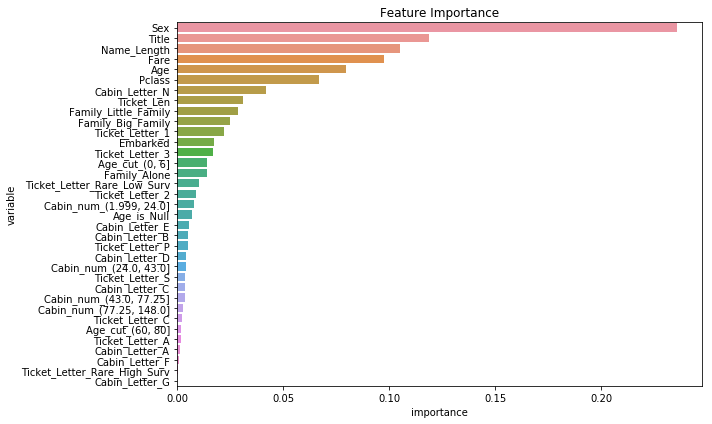

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='variable', data=importance_df.sort_values(by="importance", ascending=False))
plt.title('Feature Importance')
plt.tight_layout()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train, yhat, labels=[1,0]))

[[284  58]
 [ 27 522]]


Confusion matrix, without normalization
[[284  58]
 [ 27 522]]


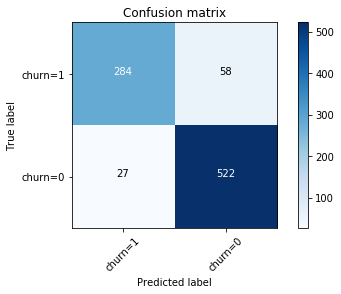

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### **<div id="V3">3. Evaluate Model Performance</div>**

Let's recap, with some basic data cleaning, analysis, and machine learning algorithms (MLA), we are able to predict passenger survival with ~80% accuracy. Not bad for a few lines of code. But the question we always ask is, can we do better and more importantly get an ROI (return on investment) for our time invested? For example, if we're only going to increase our accuracy by 1/10th of a percent, is it really worth 3-months of development. If you work in research maybe the answer is yes, but if you work in business mostly the answer is no. So, keep that in mind when improving your model.

#### **Determine a Baseline Accuracy**

Before we decide how-to make our model better, let's determine if our model is even worth keeping. To do that, we have to go back to the basics of data science 101. We know this is a binary problem, because there are only two possible outcomes; passengers survived or died. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set 68% as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.

#### ** How-to Create Your Own Model**

Our accuracy is increasing, but can we do better? Are there any signals in our data? To illustrate this, we're going to build our own decision tree model, because it is the easiest to conceptualize and requires simple addition and multiplication calculations. When creating a decision tree, you want to ask questions that segment your target response, placing the survived/1 and dead/0 into homogeneous subgroups.

Remember, the name of the game is to create subgroups using a decision tree model to get survived/1 in one bucket and dead/0 in another bucket. Our rule of thumb will be the majority rules. Meaning, if the majority or 50% or more survived, then everybody in our subgroup survived/1, but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases.

**Question 1**: Were you on the Titanic? If Yes, then majority (62%) died. Note our sample survival is different than our population of 68%. Nonetheless, if we assumed everybody died, our sample accuracy is 62%.

**Question 2**: Are you male or female? Male, majority (81%) died. Female, majority (74%) survived. Giving us an accuracy of 79%.

**Question 3A (going down the female branch with count = 314)**: Are you in class 1, 2, or 3? Class 1, majority (97%) survived and Class 2, majority (92%) survived. Since the dead subgroup is less than 10, we will stop going down this branch. Class 3, is even at a 50-50 split. No new information to improve our model is gained.

**Question 4A (going down the female class 3 branch with count = 144)**: Did you embark from port C, Q, or S? We gain a little information. C and Q, the majority still survived, so no change. Also, the dead subgroup is less than 10, so we will stop. S, the majority (63%) died. So, we will change females, class 3, embarked S from assuming they survived, to assuming they died. Our model accuracy increases to 81%.

**Question 5A (going down the female class 3 embarked S branch with count = 88)**: So far, it looks like we made good decisions. Adding another level does not seem to gain much more information. This subgroup 55 died and 33 survived, since majority died we need to find a signal to identify the 33 or a subgroup to change them from dead to survived and improve our model accuracy. We can play with our features. One I found was fare 0-8, majority survived. It's a small sample size 11-9, but one often used in statistics. We slightly improve our accuracy, but not much to move us past 82%. So, we'll stop here.

**Question 3B (going down the male branch with count = 577)**: Going back to question 2, we know the majority of males died. So, we are looking for a feature that identifies a subgroup that majority survived. Surprisingly, class or even embarked didn't matter like it did for females, but title does and gets us to 82%. Guess and checking other features, none seem to push us past 82%. So, we'll stop here for now.

With very little information, we get to 82% accuracy. On a worst, bad, good, better, and best scale, we'll set 82% to good, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model? This leads us to the next section.

### **<div id="V4">4. Tune Model with Feature Selection</div>**

As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection.

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

**The central premise when using a feature selection technique is that the data contains some features that are either redundant or irrelevant, and can thus be removed without incurring much loss of information**. Redundant and irrelevant are two distinct notions, since one relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated.

## **<div id="VI">VI. Optimize and Strategize</div>**

Basically, get back to step I and perform a new iteration. Rinse and Repeat. 
For my second iteration, I'm trying to get additional information from columns like "Cabin" and "Ticket, and to perform more feature engineering on the other columns, for example getting the length of "Names".

## **<div id="VII">VII. Model Submission</div>**

In [52]:
# Predicting the results of the tessting set with the model
yhat_test = best_model.predict(X_test)
# Submitting
submission = testing_df.copy()
submission['Survived'] = yhat_test
submission.to_csv('submission.csv', columns=['PassengerId', 'Survived'], index=False)

submission[['PassengerId', 'Survived']].head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
